# LDA 토픽 모델링

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모터사이클 야구 그래픽스 윈도우즈 중동 기독교 전자공학 의학 8개 주제
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']

# 위에서 cats 변수로 기재된 카테고리만 추출
news_df = fetch_20newsgroups(subset='all', remove=('headers', 'footers,', 'quotes'), categories=cats, random_state=0)

# LDA는 count 기반 벡터화만 적용
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english', ngram_range=(1,2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape: feat_vect.shape')

CountVectorizer Shape: feat_vect.shape


피처 벡터화된 데이터 세트 기반으로 LDA 토픽 모델링 숳애

In [3]:
lda = LatentDirichletAllocation(n_components=8, random_state=0) # 8개 토픽
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

components_: 개별 토픽별로 각 word 피처가 얼마나 많이 그 토픽에 할당됐는지에 대한 수치

In [4]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.29546885e+01, 2.70761849e+01, 1.30294110e-01, ...,
        1.51500608e+02, 3.31548277e-01, 1.57000496e+01],
       [1.25229027e-01, 1.25105371e-01, 3.00168184e+00, ...,
        5.59513781e+01, 1.25112368e-01, 3.42127017e+00],
       [2.52018786e+02, 4.55535223e+02, 1.58433624e+02, ...,
        3.91139565e+00, 3.40486211e+02, 4.03733833e+01],
       ...,
       [1.25103961e-01, 2.57159776e+01, 1.25007328e-01, ...,
        9.55978879e+01, 1.25190395e-01, 9.71056815e+01],
       [1.25247419e-01, 4.45044716e+01, 1.25469477e-01, ...,
        8.75773231e+01, 2.14939117e+01, 6.46088823e+01],
       [1.86017544e+01, 1.17928680e+01, 1.44278690e+01, ...,
        2.58114144e+01, 8.77020115e+00, 1.70435587e+01]])

8개 토픽별로 1000개의 word 피처가 해당 토픽별로 연관도 값을 가지고 있음

ex) components_array[0, 10] 값

-> Topic #0에 대해서 피처 벡터화된 행렬에서 10번째 칼럼에 해당하는 피처를 연관도 값으로 가짐

토픽별로 연관도가 높은 순으로 Word를 나열하는 함수

In [5]:
def display_topics(model, feature_names, no_top_words):
  for topic_index, topic in enumerate(model.components_):
    print('Topic #', topic_index)

    # components_array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환
    topic_word_indexed = topic.argsort()[::-1]
    top_indexes = topic_word_indexed[:no_top_words]

    # top_indexed 대상인 인덱스 별ㄹ feature_names에 해당하는 word feature 추출 후 join으로 concat
    feature_concat = ' '.join([feature_names[i] for i in top_indexes])
    print(feature_concat)

# CountVectorizer 객체 내의 전체 word 명칭을 get_features_names()로 추출
feature_names = count_vect.get_feature_names_out() # 버전 이슈로 _out으로 변경됨

# 토픽별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
like don just know use good ve time think used make way bike work problem
Topic # 1
edu thanks com mail know university does email information ca computer like help phone fax
Topic # 2
armenian turkish armenians new armenia 000 turks turkey university people 10 soviet york new york 1993
Topic # 3
god people jesus church think believe christ does christian say christians bible faith sin know
Topic # 4
dos program file image use output software windows data dos dos entry pc line number graphics
Topic # 5
people said israel know just don jews israeli did like didn say right jewish time
Topic # 6
year game think good don team time games just hit better baseball dod like 10
Topic # 7
edu file window available jpeg image ftp server graphics use version pub display files color


토픽 #0: 아마도 모터사이클?, 일반적인 단어들

토픽 #1: 전자공학 같지만 명확하지 X

토픽 #2: 명확한 중동 영역 주제어

토픽 #3: 완전 기독교

토픽 #4: 윈도우즈

토픽 #5: 기독교..

토픽 #6: 야구 + 일반적인 단어들

토픽 #7: 그래픽스

# 문서 군집화

## Opinion Review 데이터 세트로 문서 군집화 수행

## 데이터 로딩
자동차 브랜드 & 전자 제품 & 호텔 서비스 등에 대한 리뷰 내용

In [6]:
import pandas as pd
import glob, os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', 700)

# 여러 개의 파일을 DataFrame으로 로딩할 것임
path = r'/content/drive/MyDrive/Euron Homework/topics'
# path로 지정한 디렉터리 밑에 있는 모든 .data 파일들의 파일명을 리스트로 취합
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

# 개별 파일들의 파일명은 filename_list 리스트로 취합
# 파일 내용: DataFrame 로딩 후 string 변환 -> opinion_text 리스트로 취합
for file_ in all_files:
  df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')

  # 절대경로로 주어진 파일명 가공
  filename_ = file_.split('/')[-1]
  filename = filename_.split('.')[0]

  # 리스트에 추가
  filename_list.append(filename)
  opinion_text.append(df.to_string())

# df 로딩
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,fonts_amazon_kindle,"Being able to change the font sizes is awesome !\n0 For whatever reason, Amazon decided to make the Font on the Home Screen ..."
1,features_windows7,"I had to uninstall anti, virus and selected other programs, some of which did not have listings in the Programs and Features Control Panel section .\n0 This review briefly touches upon some of the key features and enhancements of Microsoft's latest OS .\n1 ..."
2,speed_garmin_nuvi_255W_gps,Another feature on the 255w is a display of the posted speed limit on the road which you are currently on right above your current displayed speed .\n0 I found myself not even looking at my car speedometer as I could easily see my current speed and the speed limit of my route at a glance .\n1 ...
3,updates_garmin_nuvi_255W_gps,"Another thing to consider was that I paid $50 less for the 750 and it came with the FM transmitter cable and a USB cord to connect it to your computer for updates and downloads .\n0 update and reroute much _more_ quickly than my other GPS .\n1 UPDATE ON THIS , It finally turned out that to see the elevation contours at lowe..."
4,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and very comfortable beds, a great shower and very clean bathrooms .\n0 The second room was smaller, with a very inconvenient bathroom layout, but at least it was quieter and we were able to sleep .\n1 ..."


## TF-IDF 형태로 피처 벡터화

In [7]:
!pip install nltk

In [8]:
# TfidfVectorizer의 tokenizer 인자로 사용될 lemmatization 어근 변환 함수 설정
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt_tab')
nltk.download('wordnet')
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

# 입력으로 들어온 token 단어들에 대해서 lemmatization 어근 변환

def LemTokens(tokens):
  return [lemmar.lemmatize(token) for token in tokens]

# TfidfVectorizer 객체 생성 시 tokenizer 인자로 해당 함수를 설정하여 lemmatization 적용
# 입력으로 문장 받아서 stop words 제거 -> 소문자 변환 -> 단어 토큰화 -> lemmatization 어근 변환
def LemNormalize(text):
  return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english', ngram_range=(1,2), min_df=0.05, max_df=0.85)

# opinion_text 칼럼값으로 feature vectorization 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

## 군집화 수행

In [10]:
# 문서 유형 - 전자제품, 자동차, 호텔
from sklearn.cluster import KMeans

# 5개 집합으로 군집화 수행
km_cluster = KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_ # 군집화된 label
cluster_centers = km_cluster.cluster_centers_ # 각 군집 별 center 좌표 값

In [11]:
document_df['cluster_label'] = cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,fonts_amazon_kindle,"Being able to change the font sizes is awesome !\n0 For whatever reason, Amazon decided to make the Font on the Home Screen ...",0
1,features_windows7,"I had to uninstall anti, virus and selected other programs, some of which did not have listings in the Programs and Features Control Panel section .\n0 This review briefly touches upon some of the key features and enhancements of Microsoft's latest OS .\n1 ...",0
2,speed_garmin_nuvi_255W_gps,Another feature on the 255w is a display of the posted speed limit on the road which you are currently on right above your current displayed speed .\n0 I found myself not even looking at my car speedometer as I could easily see my current speed and the speed limit of my route at a glance .\n1 ...,0
3,updates_garmin_nuvi_255W_gps,"Another thing to consider was that I paid $50 less for the 750 and it came with the FM transmitter cable and a USB cord to connect it to your computer for updates and downloads .\n0 update and reroute much _more_ quickly than my other GPS .\n1 UPDATE ON THIS , It finally turned out that to see the elevation contours at lowe...",0
4,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and very comfortable beds, a great shower and very clean bathrooms .\n0 The second room was smaller, with a very inconvenient bathroom layout, but at least it was quieter and we were able to sleep .\n1 ...",1


In [12]:
document_df[document_df['cluster_label']==0].sort_values(by='filename')

,filename,opinion_text,cluster_label
32,accuracy_garmin_nuvi_255W_gps,", and is very, very accurate .\n0 but for the most part, we find that the Garmin software provides accurate directions, whereever we intend to go .\n1 This functi...",0
16,battery-life_amazon_kindle,"After I plugged it in to my USB hub on my computer to charge the battery the charging cord design is very clever !\n0 After you have paged tru a 500, page book one, page, at, a, time to get from Chapter 2 to Chapter 15, see how excited you are about a low battery and all the time it took to get there !\n1 ...",0
21,battery-life_ipod_nano_8gb,short battery life I moved up from an 8gb .\n0 I love this ipod except for the battery life .\n1 ...,0
37,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 23Wh Li, ion Battery , and a 1 .\n0 Not to mention that as of now...",0
11,buttons_amazon_kindle,"I thought it would be fitting to christen my Kindle with the Stephen King novella UR, so went to the Amazon site on my computer and clicked on the button to buy it .\n0 As soon as I'd clicked the button to confirm my order it appeared on my Kindle almost immediately !\n1 ...",0
6,directions_garmin_nuvi_255W_gps,You also get upscale features like spoken directions including street names and programmable POIs .\n0 I used to hesitate to go out of my directions but no...,0
44,display_garmin_nuvi_255W_gps,"3 quot widescreen display was a bonus .\n0 This made for smoother graphics on the 255w of the vehicle moving along displayed roads, where the 750's display was more of a jerky movement .\n1 ...",0
39,eyesight-issues_amazon_kindle,"It feels as easy to read as the K1 but doesn't seem any crisper to my eyes .\n0 the white is really GREY, and to avoid considerable eye, strain I had to refresh pages every other page .\n1 The dream has always been a portable electronic device that could hold a ton of reading material, automate subscriptions and fa...",0
1,features_windows7,"I had to uninstall anti, virus and selected other programs, some of which did not have listings in the Programs and Features Control Panel section .\n0 This review briefly touches upon some of the key features and enhancements of Microsoft's latest OS .\n1 ...",0
0,fonts_amazon_kindle,"Being able to change the font sizes is awesome !\n0 For whatever reason, Amazon decided to make the Font on the Home Screen ...",0


Cluster #0은 전자기기에 대한 리뷰로 군집화되어 있음

In [13]:
document_df[document_df['cluster_label']==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
4,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and very comfortable beds, a great shower and very clean bathrooms .\n0 The second room was smaller, with a very inconvenient bathroom layout, but at least it was quieter and we were able to sleep .\n1 ...",1
14,food_holiday_inn_london,The room was packed to capacity with queues at the food buffets .\n0 The over zealous staff cleared our unfinished drinks while we were collecting cooked food and movement around the room with plates was difficult in the crowded circumstances .\n1 ...,1
12,food_swissotel_chicago,The food for our event was delicious .\n0 ...,1
46,free_bestwestern_hotel_sfo,The wine reception is a great idea as it is nice to meet other travellers and great having access to the free Internet access in our room .\n0 They also have a computer available with free internet which is a nice bonus but I didn't find that out till the day before we left but was still able to get on there to check our flight to Vegas the next day .\n1 ...,1
45,location_bestwestern_hotel_sfo,"Good Value good location , ideal choice .\n0 Great Location , Nice Rooms , Helpless Concierge\n1 ...",1
20,location_holiday_inn_london,"Great location for tube and we crammed in a fair amount of sightseeing in a short time .\n0 All in all, a normal chain hotel on a nice lo...",1
5,parking_bestwestern_hotel_sfo,Parking was expensive but I think this is common for San Fran .\n0 there is a fee for parking but well worth it seeing no where to park if you do have a car .\n1 ...,1
47,price_holiday_inn_london,"All in all, a normal chain hotel on a nice location , I will be back if I do not find anthing closer to Picadilly for a better price .\n0 ...",1
7,room_holiday_inn_london,"We arrived at 23,30 hours and they could not recommend a restaurant so we decided to go to Tesco, with very limited choices but when you are hingry you do not careNext day they rang the bell at 8,00 hours to clean the room, not being very nice being waken up so earlyEvery day they gave u...",1
50,rooms_bestwestern_hotel_sfo,"Great Location , Nice Rooms , H...",1


Cluster #1은 호텔에 대한 리뷰로 군집화됨

In [14]:
document_df[document_df['cluster_label']==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
33,gas_mileage_toyota_camry_2007,Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n0 ...,2
36,mileage_honda_accord_2008,"It's quiet, get good gas mileage and looks clean inside and out .\n0 The mileage is great, and I've had to get used to stopping less for gas .\n1 Thought gas ...",2
15,transmission_toyota_camry_2007,"After slowing down, transmission has to be kicked to speed up .\n0 ...",2


Cluster #2는 자동차에 대한 리뷰로 군집화됨

In [15]:
document_df[document_df['cluster_label']==3].sort_values(by='filename')

,filename,opinion_text,cluster_label
13,comfort_honda_accord_2008,"Drivers seat not comfortable, the car itself compared to other models of similar class .\n0 ...",3
17,comfort_toyota_camry_2007,"Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n0 Seats are fine, in fact of all the smaller sedans this is the most comfortable I found for the price as I am 6', 2 and 250# .\n1 Great gas mileage and comfortable on long trips ...",3
23,performance_honda_accord_2008,"Very happy with my 08 Accord, performance is quite adequate it has nice looks and is a great long, distance cruiser .\n0 6, 4, 3 eco engine has poor performance and gas mileage of 22 highway .\n1 Overall performance is good but comfort level is poor .\n2 ...",3
49,price_amazon_kindle,"If a case was included, as with the Kindle 1, that would have been reflected in a higher price .\n0 lower overall price, with nice leather cover .\n1 ...",3
30,quality_toyota_camry_2007,I previously owned a Toyota 4Runner which had incredible build quality and reliability .\n0 I bought the Camry because of Toyota reliability and qua...,3
19,seats_honda_accord_2008,"Front seats are very uncomfortable .\n0 No memory seats, no trip computer, can only display outside temp with trip odometer .\n1 ...",3


Cluster #3은 전자기기 + 자동차 내비게이션에 대한 리뷰

In [16]:
document_df[document_df['cluster_label']==4].sort_values(by='filename')

,filename,opinion_text,cluster_label
48,interior_honda_accord_2008,I love the new body style and the interior is a simple pleasure except for the center dash .\n0 ...,4
26,interior_toyota_camry_2007,"First of all, the interior has way too many cheap plastic parts like the cheap plastic center piece that houses the clock .\n0 3 blown struts at 30,000 miles, interior trim coming loose and rattling squeaking, stains on paint, and bug splats taking paint off, premature uneven brake wear, on 3rd windsh...",4


Cluster #5는 호텔 세부요소(음식, 스태프 등)에 대해 군집화됨

3개 그룹으로 군집화하기

In [17]:
from sklearn.cluster import KMeans

# 3개 집합으로 군집화
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_

# 소속 클러스터를 cluster_label 칼럼으로 할당하고 cluster_label 값으로 정렬
document_df['cluster_label'] = cluster_label
document_df.sort_values(by='cluster_label')

,filename,opinion_text,cluster_label
0,fonts_amazon_kindle,"Being able to change the font sizes is awesome !\n0 For whatever reason, Amazon decided to make the Font on the Home Screen ...",0
1,features_windows7,"I had to uninstall anti, virus and selected other programs, some of which did not have listings in the Programs and Features Control Panel section .\n0 This review briefly touches upon some of the key features and enhancements of Microsoft's latest OS .\n1 ...",0
2,speed_garmin_nuvi_255W_gps,Another feature on the 255w is a display of the posted speed limit on the road which you are currently on right above your current displayed speed .\n0 I found myself not even looking at my car speedometer as I could easily see my current speed and the speed limit of my route at a glance .\n1 ...,0
3,updates_garmin_nuvi_255W_gps,"Another thing to consider was that I paid $50 less for the 750 and it came with the FM transmitter cable and a USB cord to connect it to your computer for updates and downloads .\n0 update and reroute much _more_ quickly than my other GPS .\n1 UPDATE ON THIS , It finally turned out that to see the elevation contours at lowe...",0
6,directions_garmin_nuvi_255W_gps,You also get upscale features like spoken directions including street names and programmable POIs .\n0 I used to hesitate to go out of my directions but no...,0
11,buttons_amazon_kindle,"I thought it would be fitting to christen my Kindle with the Stephen King novella UR, so went to the Amazon site on my computer and clicked on the button to buy it .\n0 As soon as I'd clicked the button to confirm my order it appeared on my Kindle almost immediately !\n1 ...",0
10,screen_ipod_nano_8gb,"As always, the video screen is sharp and bright .\n0 2, inch screen and a glossy, polished aluminum finish that one CNET editor described as looking like a Christmas tree ornament .\n1 ...",0
8,satellite_garmin_nuvi_255W_gps,"It's fast to acquire satellites .\n0 If you've ever had a Brand X GPS take you on some strange route that adds 20 minutes to your trip, has you turn the wrong way down a one way road, tell you to turn AFTER you've passed the street, frequently loses the satellite signal, or has old maps missing streets, you know how important this stuff is .\n1 ...",0
25,video_ipod_nano_8gb,"I bought the 8, gig Ipod Nano that has the built, in video camera .\n0 Itunes has an on, line store, where you may purchase and download music and videos which will install onto the ipod .\n1 ...",0
21,battery-life_ipod_nano_8gb,short battery life I moved up from an 8gb .\n0 I love this ipod except for the battery life .\n1 ...,0


Cluster #0: 전자기기 리뷰

Cluster #1: 자동차 리뷰

Cluster #2: 호텔 리뷰

로 잘 군집화됨

## 군집별 핵심 단어 추출하기

각 군집에 속한 문서는 핵심 단어를 주축으로 군집화돼 있을 것임 -> 각 군집을 구성하는 핵심 단어가 어떤 것이 있는지 확인하기

In [18]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape :', cluster_centers.shape)
print(cluster_centers)

cluster_centers shape : (3, 4610)
[[0.0100545  0.         0.         ... 0.00706288 0.         0.        ]
 [0.         0.00099548 0.00174656 ... 0.         0.00183397 0.00144581]
 [0.         0.00092552 0.         ... 0.         0.         0.        ]]


군집이 3개, word 피처가 4611개로 구성됨

배열 값은 각 군집 내 피처 위치가 개별 중심과 얼마나 가까운가를 나타내므로 이 값을 이용해 각 군집별 핵심 단어를 찾을 수 있음

In [19]:
# 군집별 top n 핵심 단어, 그 단어의 중심 위치 상댓값, 대상 파일명 반환
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
  cluster_details={}

  # cluster_centers array의 값이 큰 순으로 정렬된 인덱스 값 반환
  centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]

  for cluster_num in range(clusters_num):
    # 개별 군집별 정보 담을 데이터 초기화
    cluster_details[cluster_num] = {}
    cluster_details[cluster_num]['cluster'] = cluster_num

    # cluster_centers_.argsort()[:,::-1]로 구한 인덱스 이용해서 top n 피처 단어 구함
    top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
    top_features = [feature_names[ind] for ind in top_feature_indexes]

    # top_feature_indexes로 해당 피처 단어의 중심 위치 상댓값 구함
    top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()

    cluster_details[cluster_num]['top_features'] = top_features
    cluster_details[cluster_num]['top_features_value'] = top_feature_values
    filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
    filenames = filenames.values.tolist()
    cluster_details[cluster_num]['filenames']=filenames

  return cluster_details

In [20]:
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('Reviews 파일명 :',cluster_detail['filenames'][:7])
        print('==================================================')

In [21]:
feature_names = tfidf_vect.get_feature_names_out()

cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=document_df, feature_names=feature_names, clusters_num=3, top_n_features=10)
print_cluster_details(cluster_details)

####### Cluster 0
Top features: ['screen', 'battery', 'keyboard', 'battery life', 'life', 'kindle', 'direction', 'video', 'size', 'voice']
Reviews 파일명 : ['fonts_amazon_kindle', 'features_windows7', 'speed_garmin_nuvi_255W_gps', 'updates_garmin_nuvi_255W_gps', 'directions_garmin_nuvi_255W_gps', 'satellite_garmin_nuvi_255W_gps', 'screen_ipod_nano_8gb']
####### Cluster 1
Top features: ['room', 'hotel', 'service', 'staff', 'food', 'location', 'bathroom', 'clean', 'price', 'parking']
Reviews 파일명 : ['bathroom_bestwestern_hotel_sfo', 'parking_bestwestern_hotel_sfo', 'room_holiday_inn_london', 'service_swissotel_hotel_chicago', 'food_swissotel_chicago', 'food_holiday_inn_london', 'location_holiday_inn_london']
####### Cluster 2
Top features: ['interior', 'seat', 'mileage', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'performance', 'quality']
Reviews 파일명 : ['comfort_honda_accord_2008', 'transmission_toyota_camry_2007', 'comfort_toyota_camry_2007', 'seats_honda_accord_2008', 'per

# 문서 유사도

In [22]:
import numpy as np

# 코사인 유사도 계산해서 반환하는 함수
def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product/l2_norm

    return similarity

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


희소 행렬임 -> array로 만들기 위해 밀집 행렬로 변환한 뒤 다시 각각을 배열로 변환

In [24]:
feature_vect_dense = feature_vect_simple.todense()

# 첫번째 문장과 두번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )
# 두 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple=cos_similarity(vect1, vect2)
print('문장 1, 문장 3 cosine 유사도: {0:.3f}'.format(similarity_simple))

vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple=cos_similarity(vect1, vect3)
print('문장 2, 문장 3 cosine 유사도: {0:.3f}'.format(similarity_simple))

similarity_simple=cos_similarity(vect2, vect3)
print('문장 2, 문장 3 cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 cosine 유사도: 0.402
문장 2, 문장 3 cosine 유사도: 0.404
문장 2, 문장 3 cosine 유사도: 0.456


사이킷런의 API 이용해서 코사인 유사도 측정하기

In [25]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [26]:
# 쌍으로(pair) 코사인 유사도 값 제공
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape: ', similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape:  (3, 3)


## Opinion Review 데이터 세트를 이용한 문서 유사도 측정

In [27]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = r'/content/drive/MyDrive/Euron Homework/topics'
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

for file_ in all_files:
  df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
  filename_ = file_.split('/')[-1]
  filename = filename_.split('.')[0]
  filename_list.append(filename)
  opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english', ngram_range=(1,2), min_df=0.05, max_df=0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

호텔을 주제로 군집화된 문서의 피처 벡터화된 데이터를 다른 문서의 데이터와의 코사인 유사도를 측정해 비교하기

In [42]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=1인 데이터가 호텔로 군집화된 데이터
hotel_indexes = document_df[document_df['cluster_label']==1].index
print('호텔로 클러스터링된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 군집화된 데이터 중 첫 번째 문서를 추출해 파일명 표시
comparison_docname=document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 ',comparison_docname,' 와 타 문서 유사도######')

'''document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출
이를 이용해 호텔로 군집화된 문서 중 첫 번째 문서와 다른 문서 간 코사인 유사도 측정'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 클러스터링된 문서들의 DataFrame Index: Index([4, 5, 7, 9, 12, 14, 20, 22, 24, 28, 29, 35, 45, 46, 47, 50], dtype='int64')
##### 비교 기준 문서명  bathroom_bestwestern_hotel_sfo  와 타 문서 유사도######
[[1.         0.03638645 0.51442565 0.13867904 0.05221246 0.0430688
  0.06193142 0.32629328 0.13989601 0.11282857 0.09518076 0.07049388
  0.05857476 0.06189595 0.11742762 0.38038807]]


가장 유사도가 큰 파일명 및 유사도:
 filename       room_holiday_inn_london
similalrity                   0.514426
Name: 7, dtype: object


Text(0.5, 1.0, 'bathroom_bestwestern_hotel_sfo')

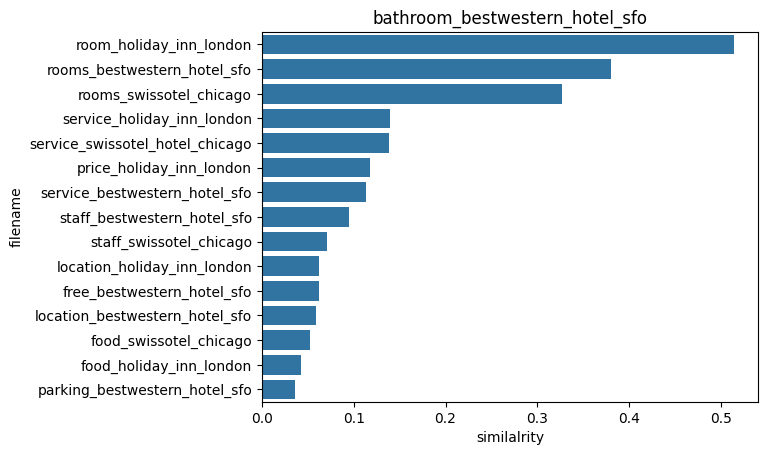

In [44]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 추출 & 자기 자신 제외
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:,1:]

# 유사도 큰 순으로 hotel_indexes 추출해 재정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similalrity']=hotel_1_sim_value
print('가장 유사도가 큰 파일명 및 유사도:\n', hotel_1_sim_df.iloc[0, :])

sns.barplot(x='similalrity', y='filename', data=hotel_1_sim_df)
plt.title(comparison_docname)

# 한글 텍스트 처리 - 네이버 영화 평점 감성 분석

## 데이터 로딩

In [53]:
import pandas as pd

# cp949는 오류가 남
train_df = pd.read_csv('/content/drive/MyDrive/Euron Homework/rating_data/ratings_train.txt', sep='\t', encoding='utf-8')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [54]:
train_df['label'].value_counts()

,count
label,
0,75173
1,74827


1: 긍정 감성

0: 부정 감성

## 데이터 전처리

In [55]:
import re

train_df = train_df.fillna(' ')
# 정규 표현식으로 숫자를 공백으로 변경
train_df['document'] = train_df['document'].apply(lambda x:re.sub(r"\d+"," ",x))

# 테스트 데이터 세트를 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('/content/drive/MyDrive/Euron Homework/rating_data/ratings_test.txt', sep='\t', encoding='utf-8')
train_df = train_df.fillna(' ')
train_df['document'] = train_df['document'].apply(lambda x : re.sub(r"\d+"," ",x))

# id 칼럼 삭제
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

## 피처 벡터화

In [57]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 29.6 MB/s eta 0:00:00


In [58]:
# 형태소 분석 -> 형태소 단어로 토큰화
from konlpy.tag import Twitter

twitter = Twitter()
def tw_tokenizer(text):
  # 입력 인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 형태로 반환
  tokens_ko = twitter.morphs(text)
  return tokens_ko

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Twitter 객체의 morphs() 객체를 이용한 tokenizer를 사용
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

## 감성 분석

In [60]:
# 로지스틱 회귀를 감성 분석 분류 수행
lg_clf = LogisticRegression(random_state=0, solver='liblinear')

# 파라미터 C 최적화를 위해 GridSearchCV 이용
params = {'C': [1, 3.5, 4.5, 5.5, 10]}
grid_cv = GridSearchCV(lg_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'C': 3.5} 0.8593


테스트 세트를 이용해 최종 감성 분석 예측 수행

In [62]:
from sklearn.metrics import accuracy_score

# 학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환함
test_df = test_df.fillna(' ')
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifier는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도: ', accuracy_score(test_df['label'], preds))

Logistic Regression 정확도:  0.86108
